##Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Load Datasets

In [2]:
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding="latin1",low_memory='False')
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


##Observe the datasets

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14259 entries, 0 to 14258
Columns: 135 entries, eventid to related
dtypes: float64(74), int64(7), object(54)
memory usage: 14.7+ MB


In [4]:
df.nunique()

eventid       14259
iyear            13
imonth           13
iday             32
approxdate       19
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related         143
Length: 135, dtype: int64

In [5]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.425900e+04,14259.000000,14259.000000,14259.000000,14259.000000,14259.000000,14259.000000,13772.000000,13772.000000,14258.000000,14258.000000,14258.000000,14258.000000,14258.000000,14258.000000,1858.000000,14258.000000,14258.000000,14258.0,14258.000000,24.000000,2.000000,14258.000000,13408.000000,14218.000000,192.000000,137.000000,166.000000,20.000000,12.000000,20.000000,0.0,0.0,0.0,14258.000000,31.000000,0.0,14258.000000,3068.000000,912.000000,...,233.000000,9.000000,8.000000,0.0,0.0,0.0,18.000000,14258.000000,11420.00000,868.000000,746.000000,114.000000,101.000000,18.000000,15.000000,12175.000000,1263.000000,1364.000000,10792.000000,1234.000000,1236.000000,14258.000000,6407.000000,3.299000e+03,14104.000000,1183.000000,1183.000000,337.000000,250.000000,14008.000000,3.900000e+02,1.0,8.300000e+01,1.0,573.000000,448.000000,14258.000000,14258.000000,14258.000000,14258.000000
mean,1.977436e+11,1977.372537,6.181079,15.198261,0.021530,192.658461,5.705940,29.405349,-25.804561,1.228994,0.009959,0.991303,0.990251,0.898794,-1.522303,1.289020,0.048183,0.904264,0.0,3.194066,4.708333,3.000000,6.630102,39.480832,145.659727,9.416667,50.569343,178.542169,7.000000,45.416667,161.750000,NaN,NaN,NaN,0.039276,0.387097,NaN,0.002455,-14.423403,-80.486842,...,4.424893,0.888889,2.750000,NaN,NaN,NaN,0.444444,6.662786,10.79711,6.321429,9.576408,6.052632,6.495050,6.166667,9.133333,1.199918,0.184481,0.348974,1.253706,0.394652,0.051780,0.598261,3.428906,1.829172e+05,0.083877,-7.841082,0.253593,2.570475,30.572000,0.027913,3.801887e+06,20000.0,1.426646e+06,0.0,2.895288,7.303571,-3.559896,-3.512344,0.285734,-2.428111
std,3.139999e+08,3.143381,3.360118,8.980147,0.145149,175.618845,3.355184,22.209016,55.534477,0.866373,0.099302,0.092854,0.098258,0.301612,3.561831,0.578653,0.214161,0.294239,0.0,2.040586,2.475606,1.414214,6.091475,30.068946,80.755681,6.914840,28.708165,81.189983,5.991222,25.061591,66.262536,NaN,NaN,NaN,0.194258,0.495138,NaN,0.049486,57.513563,39.140713,...,2.986273,0.333333,2.964071,NaN,NaN,NaN,0.511310,2.409397,7.05308,1.858712,6.888386,1.981517,6.221935,1.248529,6.621034,6.507691,1.060759,2.589823,7.627515,2.460524,0.320281,0.877854,0.526145,1.780330e+06,0.277213,138.764771,4.440424,56.031099,71.603359,0.164728,5.094505e+07,NaN,4.988971e+06,NaN,1.272158,26.432842,4.524166,4.573991,0.647098,4.484891
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.0,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,21.000000,1.000000,8.000000,45.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,2.000000,1.00000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.976020e+11,1976.000000,3.000000,7.000000,0.000000,69.000000,2.000000,13.743611,-80.214195,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.

##Renaming the columns

In [6]:
df.rename(columns= {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                    'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target'
                    ,'nkilled':'Killed','nwound':'Wound','summary':'Summary','gname':'Group','targettype1_txt':'Target_type','weaptype1_txt':'Weapon_type'
                    ,'motive':'Motive'}, inplace=True)

##Cleaning the datasets

In [7]:
df=df[['Year','Month','Day','Country',
                    'State','Region','AttackType','Target'
                    ,'Wound','Summary','Group','Weapon_type'
                    ,'Motive']]
df.head()

,Year,Month,Day,Country,State,Region,AttackType,Target,Wound,Summary,Group,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,0.0,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,0.0,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,Unknown,Incendiary,NaN


In [8]:
df.shape

(14259, 13)

In [9]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State             64
Region             0
AttackType         1
Target           143
Wound           3467
Summary        13346
Group              1
Weapon_type        1
Motive         13612
dtype: int64

In [10]:
df.info

<bound method DataFrame.info of        Year  Month  Day  ...                               Group Weapon_type Motive
0      1970      7    2  ...                              MANO-D     Unknown    NaN
1      1970      0    0  ...  23rd of September Communist League     Unknown    NaN
2      1970      1    0  ...                             Unknown     Unknown    NaN
3      1970      1    0  ...                             Unknown  Explosives    NaN
4      1970      1    0  ...                             Unknown  Incendiary    NaN
...     ...    ...  ...  ...                                 ...         ...    ...
14254  1981      8   29  ...                        Palestinians  Explosives    NaN
14255  1981      8   29  ...                             Unknown  Explosives    NaN
14256  1981      8   29  ...                             Unknown  Incendiary    NaN
14257  1981      8   29  ...                             Unknown     Unknown    NaN
14258  1981      8   30  ...                

##Checking the null values in our datasets

In [19]:
df["AttackType"]=df["AttackType"].fillna(0)
df["Wound"]=df["Wound"].fillna(0)

In [24]:
df.describe()

,Year,Month,Day,Wound
count,14259.000000,14259.000000,14259.000000,14259.000000
mean,1977.372537,6.181079,15.198261,0.948874
std,3.143381,3.360118,8.980147,6.657428
min,1970.000000,0.000000,0.000000,0.000000
25%,1976.000000,3.000000,7.000000,0.000000
50%,1978.000000,6.000000,15.000000,0.000000
75%,1980.000000,9.000000,23.000000,0.000000
max,1986.000000,12.000000,31.000000,285.000000


In [25]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


##Data Visualization

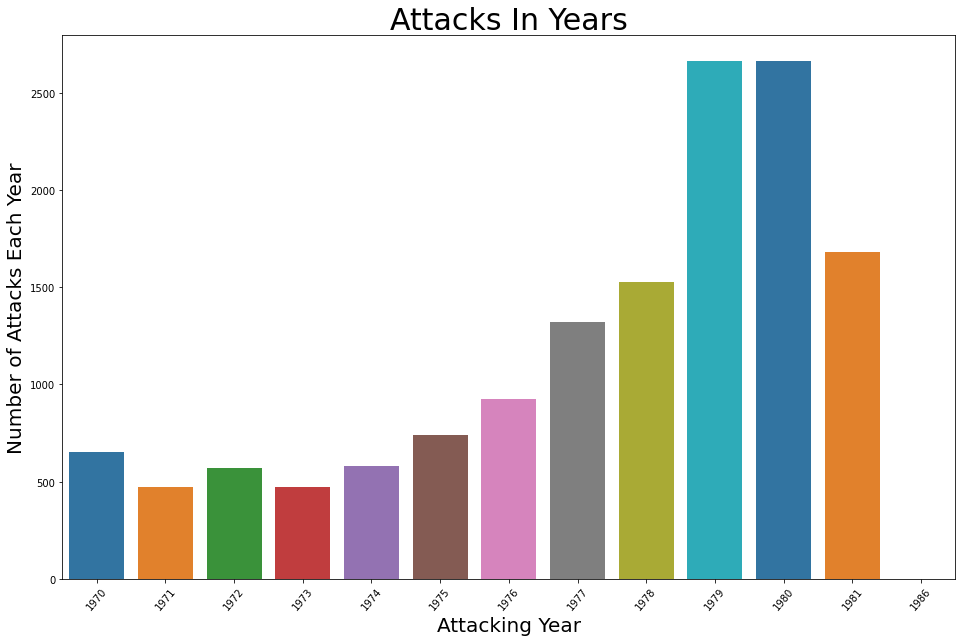

In [33]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (16,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

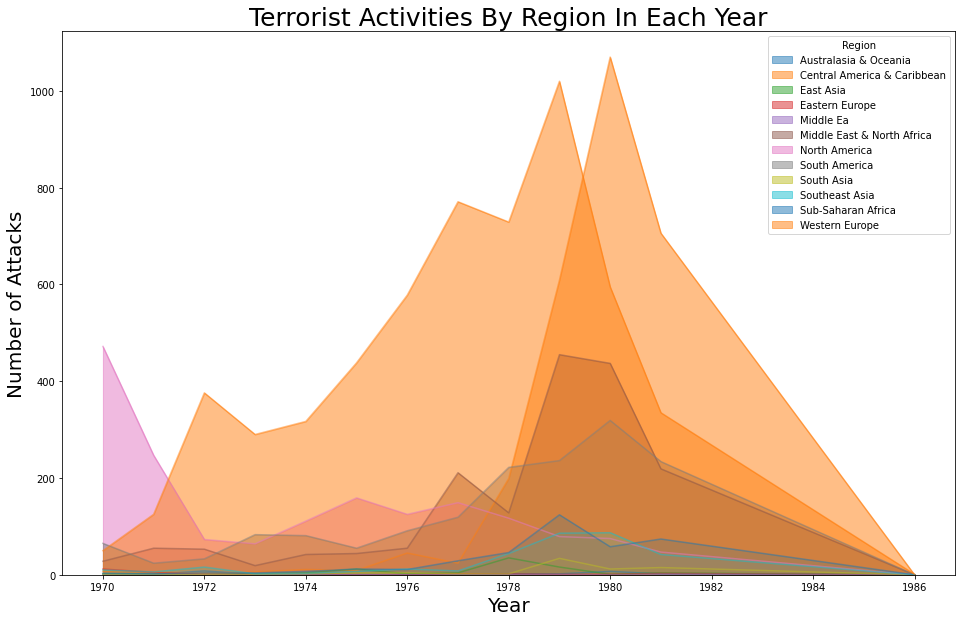

In [32]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(16,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [34]:
attack = df.Country.value_counts()[:10]
attack

United Kingdom    1861
United States     1587
El Salvador       1585
Italy             1181
Spain             1175
Colombia           659
Guatemala          632
France             612
Turkey             585
Nicaragua          345
Name: Country, dtype: int64

In [35]:
df.Group.value_counts()[1:10]

Irish Republican Army (IRA)                         1183
Basque Fatherland and Freedom (ETA)                  612
Farabundo Marti National Liberation Front (FMLN)     272
Palestinians                                         265
Protestant extremists                                206
Red Brigades                                         200
Sandinista National Liberation Front (FSLN)          197
Ulster Volunteer Force (UVF)                         175
Revolutionary Armed Forces of Colombia (FARC)        175
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


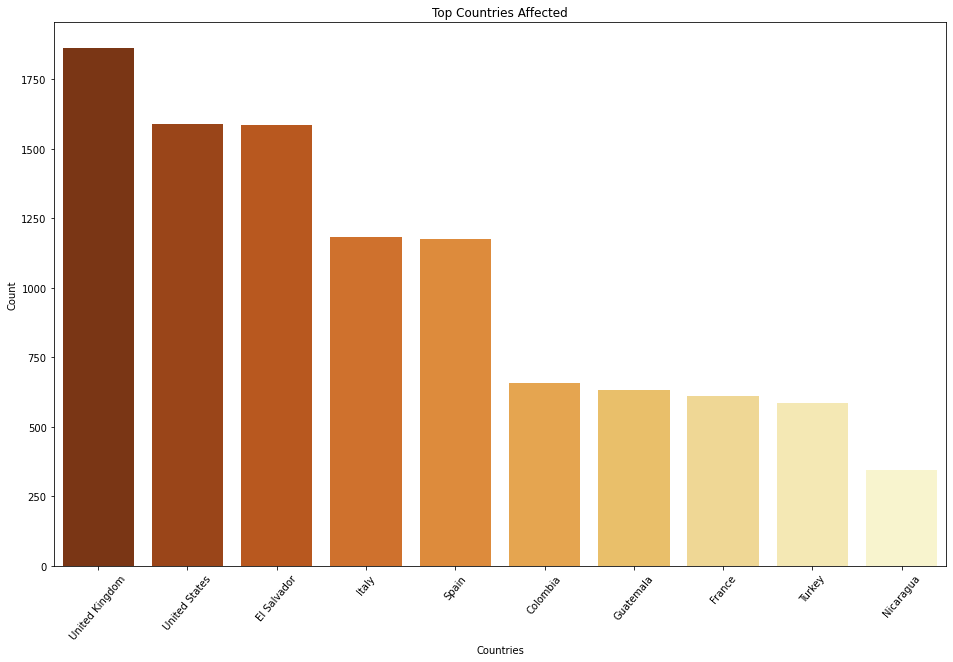

In [36]:
plt.subplots(figsize=(16,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()